In [6]:
import pandas as pd

df = pd.read_csv('C:/Users/student/Downloads/archive (1)/smartphones_cleaned_v6.csv')
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [7]:
# 1. Dimension
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# 2. Structure
print("\nData Types:")
print(df.dtypes) 
print("\nMissing Values:")
print(df.isnull().sum())  

# 3. Summary
print("\nSummary Statistics:")
print(df.describe())  

Number of rows: 980
Number of columns: 26

Data Types:
brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
resolution_width               int64
resolution_height   

In [10]:
import matplotlib.pyplot as plt

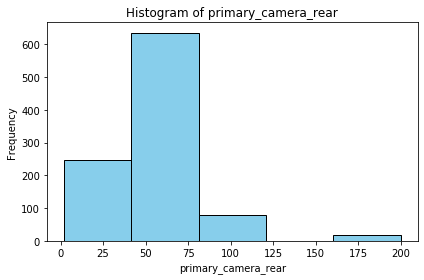

In [17]:
# Histogram for Price
plt.hist(df['primary_camera_rear'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of primary_camera_rear')
plt.xlabel('primary_camera_rear')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

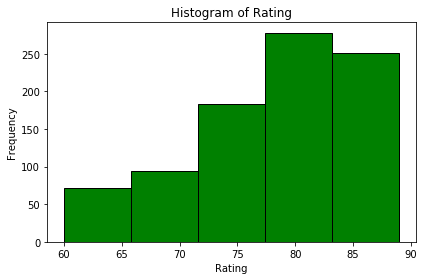

In [16]:
# Histogram for Price
plt.hist(df['rating'], bins=5, color='green', edgecolor='black')
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

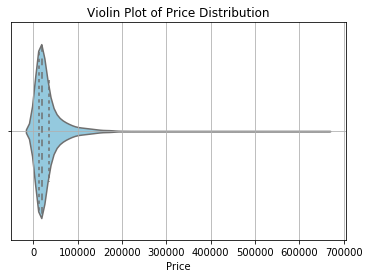

In [19]:
import seaborn as sns

sns.violinplot(x=df['price'], color='skyblue', inner='quartile')
plt.title('Violin Plot of Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

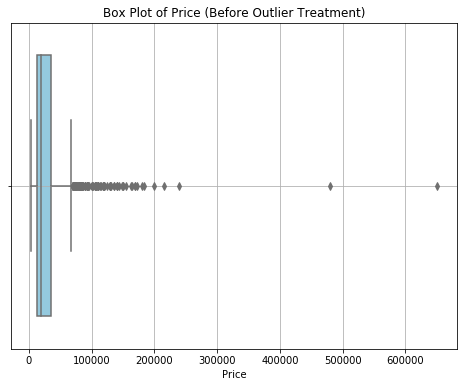

In [21]:
# Draw box plot before outlier treatment
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Box Plot of Price (Before Outlier Treatment)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [22]:
# Calculate interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Identified outliers:")
print(outliers)

# Remove outliers (optional step)
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Identified outliers:
    brand_name                             model   price  rating  has_5g  \
14     samsung       Samsung Galaxy S23 Ultra 5G  114990     NaN    True   
27       apple           Apple iPhone 14 Pro Max  129990    76.0    True   
29     oneplus                    OnePlus 11 Pro   69999     NaN    True   
37     samsung       Samsung Galaxy S22 Ultra 5G   91999     NaN    True   
56       apple              Apple iPhone 14 Plus   74999    82.0    True   
..         ...                               ...     ...     ...     ...   
951     huawei  Huawei Mate 30 RS Porsche Design  214990     NaN    True   
954     huawei                     Huawei Mate X  169000     NaN    True   
971       oppo                      Oppo Find X6   69990    89.0    True   
973     google                Google Pixel 8 Pro   70990    80.0    True   
974       vivo                     Vivo X Fold 2  119990     NaN    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor

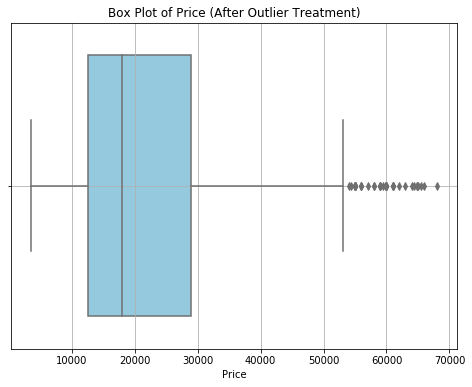

In [23]:
# Draw box plot after outlier treatment
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['price'], color='skyblue')
plt.title('Box Plot of Price (After Outlier Treatment)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()

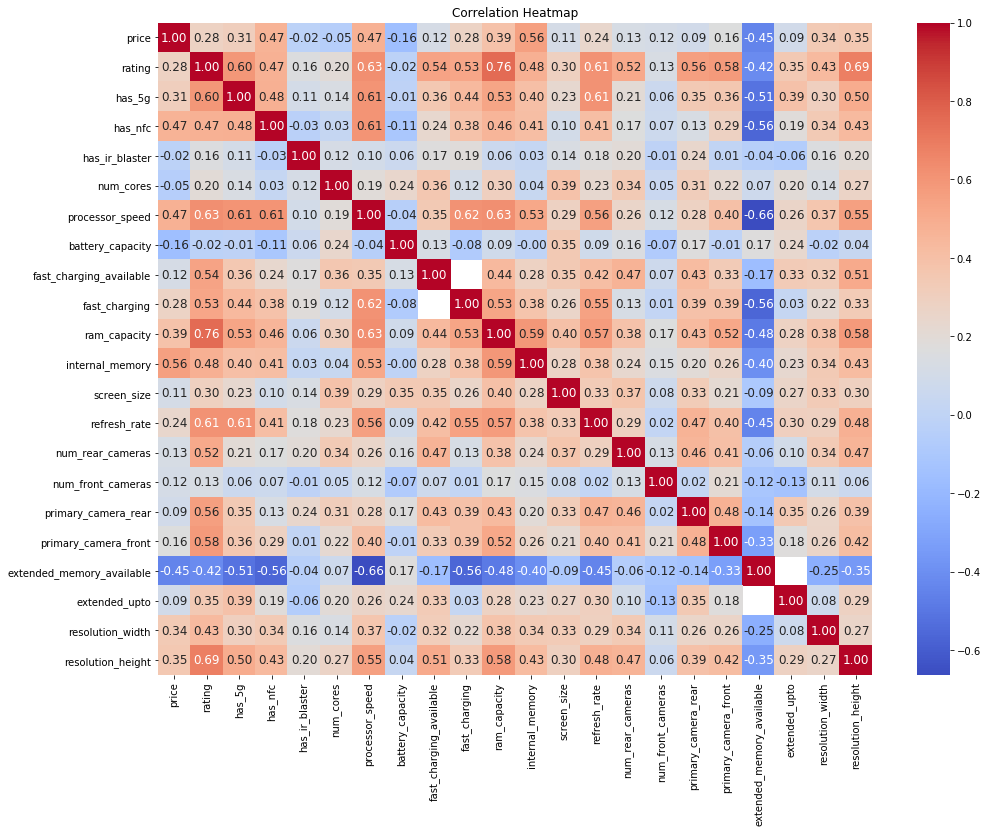

In [31]:
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.show()

Original Data:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3               

Original Data:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3               

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'smartphone_data.csv' with your actual dataset file)
df = pd.read_csv(r'D:\B R Shreesha\smartphones_cleaned_v6.csv')

# Display the first few rows of the dataset
print("Original Data:")
print(df.iloc[:,1:10].head())

# Select continuous variables (replace 'continuous_var1', 'continuous_var2', etc. with actual column names)
continuous_vars = ['price', 'battery_capacity', 'processor_speed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the continuous variables
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# Display the first few rows of the standardized dataset
print("\nStandardized Data:")
print(df.iloc[:,1:10].head())

Original Data:
                       model  price  rating  has_5g  has_nfc  has_ir_blaster  \
0              OnePlus 11 5G  54999    89.0    True     True           False   
1  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False           False   
2      Samsung Galaxy A14 5G  16499    75.0    True    False           False   
3       Motorola Moto G62 5G  14999    81.0    True    False           False   
4         Realme 10 Pro Plus  24999    82.0    True    False           False   

  processor_brand  num_cores  processor_speed  
0      snapdragon        8.0              3.2  
1      snapdragon        8.0              2.2  
2          exynos        8.0              2.4  
3      snapdragon        8.0              2.2  
4       dimensity        8.0              2.6  

Standardized Data:
                       model     price  rating  has_5g  has_nfc  \
0              OnePlus 11 5G  0.568908    89.0    True     True   
1  OnePlus Nord CE 2 Lite 5G -0.317160    81.0    True    Fals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    float64
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer


df = pd.read_csv(r'D:\B R Shreesha\smartphones_cleaned_v6.csv')
# Display the first few rows of the dataset
print("Original Data:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values
# For numerical columns, we'll use the mean to fill missing values
# For categorical columns, we'll use the most frequent value to fill missing values

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the SimpleImputer for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the respective columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Display the first few rows of the preprocessed dataset
print("\nPreprocessed Data:")
print(df.head())

# Check for missing values again to ensure they are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Original Data:
  brand_name                      model     price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  0.568908    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G -0.317160    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G -0.405488    75.0    True    False   
3   motorola       Motorola Moto G62 5G -0.443452    81.0    True    False   
4     realme         Realme 10 Pro Plus -0.190362    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0         1.666046  ...   
1           False      snapdragon        8.0        -0.489860  ...   
2           False          exynos        8.0        -0.058678  ...   
3           False      snapdragon        8.0        -0.489860  ...   
4           False       dimensity        8.0         0.372503  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120               

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer


df = pd.read_csv(r'D:\B R Shreesha\smartphones_cleaned_v6.csv')
# Display the first few rows of the dataset
print("Original Data:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values
# For numerical columns, we'll use the mean to fill missing values
# For categorical columns, we'll use the most frequent value to fill missing values

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the SimpleImputer for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the respective columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Display the first few rows of the preprocessed dataset
print("\nPreprocessed Data:")
print(df.head())

# Check for missing values again to ensure they are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Original Data:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3               